In [1]:
import sys
# path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY' # PC notebook luiz
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
path = r'C:\Users\UFG\Documents\github\PAREPY' # PC branco wander
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
from obj_function import ishigami
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel

def sobol_algorithm(setup):
    n_samples = setup['number of samples']
    obj = setup['objective function']
    none_variable = setup['none variable']

    dist_a = sampling_algorithm_structural_analysis_kernel(setup)
    dist_b = sampling_algorithm_structural_analysis_kernel(setup)
    y_a = dist_a['G_0'].to_list()
    y_b = dist_b['G_0'].to_list()
    f_0_2 = (sum(y_a) / n_samples) ** 2
    print(f_0_2)

    A = dist_a.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    B = dist_b.drop(['R_0', 'S_0', 'G_0', 'I_0'], axis=1).to_numpy()
    
    K = A.shape[1]

    s_i = []
    s_t = []
    for i in range(K):
        C = np.copy(B) 
        C[:, i] = A[:, i]
        y_c_i = []
        for j in range(n_samples):
            _, _, g = obj(list(C[j, :]), none_variable)
            y_c_i.append(g[0])  
        
        y_a_dot_y_c_i = [y_a[m] * y_c_i[m] for m in range(n_samples)]
        y_b_dot_y_c_i = [y_b[m] * y_c_i[m] for m in range(n_samples)]
        y_a_dot_y_a = [y_a[m] * y_a[m] for m in range(n_samples)]

        print(sum(y_a_dot_y_c_i))
        print(sum(y_b_dot_y_c_i))
        s_i.append((sum(y_a_dot_y_c_i) - f_0_2) / (sum(y_a_dot_y_a) - f_0_2))
        s_t.append((sum(y_b_dot_y_c_i) - f_0_2) / (sum(y_a_dot_y_a) - f_0_2))


    return s_i, s_t, dist_a, dist_b

# Dataset
f = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
p = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
w = {'type': 'uniform', 'parameters': {'min': -3.14, 'max': 3.14}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 10000, 
             'number of dimensions': len(var), 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': ishigami,
             'name simulation': None,
        }

# Call algorithm
s_i, s_t, a, b = sobol_algorithm(setup)
print(s_i)
print(s_t)
b

12.423427484838312
142268.7833737906
182292.38033798413
187324.00062816043
150339.02068454676
123373.985500063
200225.79210308162
[np.float64(0.6638481711686264), np.float64(0.8741011509806217), np.float64(0.5756744190930825)]
[np.float64(0.8506207812529747), np.float64(0.7015084366334846), np.float64(0.9343081651250732)]


,X_0,X_1,X_2,R_0,S_0,G_0,I_0
0,2.722911,-0.946007,2.606751,NaN,NaN,5.950202,0.0
1,1.977668,0.958225,-2.186902,NaN,NaN,6.654474,0.0
2,3.113591,0.850266,1.120740,NaN,NaN,3.983011,0.0
3,-2.247871,-0.345188,2.051242,NaN,NaN,-0.667861,1.0
4,-2.006975,1.743233,-0.028143,NaN,NaN,5.887540,0.0
...,...,...,...,...,...,...,...
9995,-2.087147,1.013747,-0.183855,NaN,NaN,4.173779,0.0
9996,-1.191822,-2.862214,1.475454,NaN,NaN,-0.616890,1.0
9997,-0.098182,1.883293,-2.919966,NaN,NaN,5.884060,0.0
9998,-0.333670,-0.715191,-1.060603,NaN,NaN,2.661933,0.0


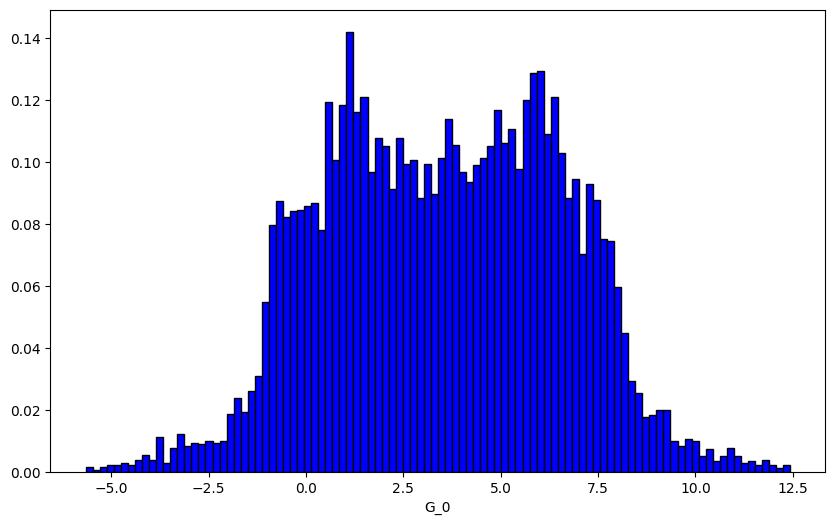

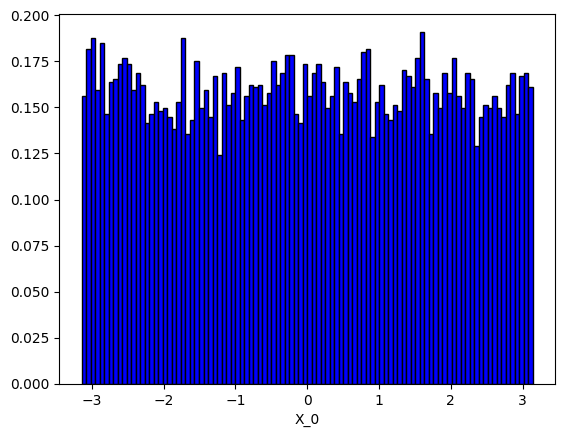

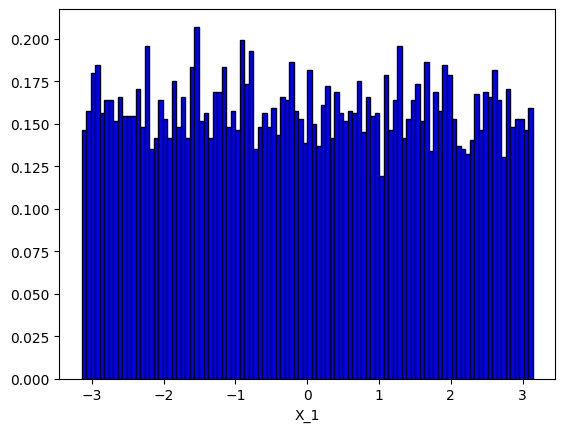

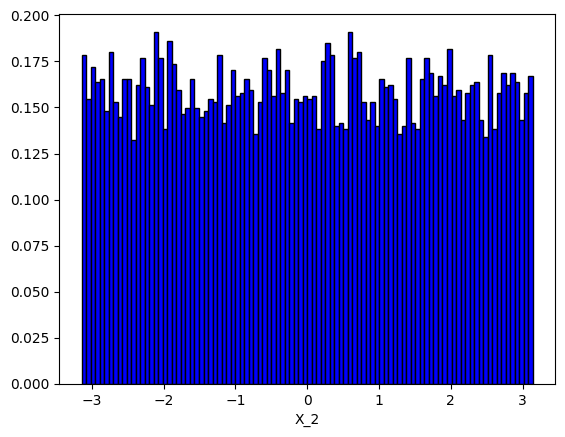

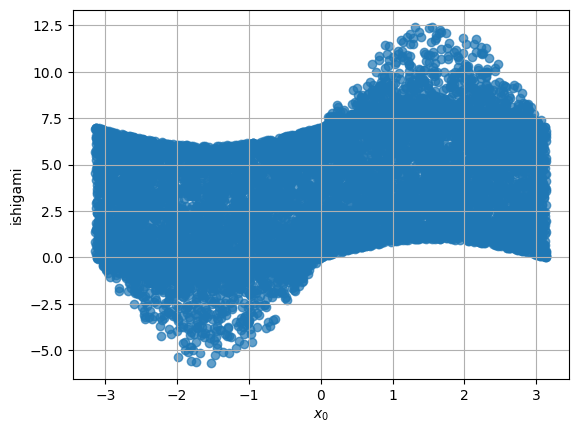

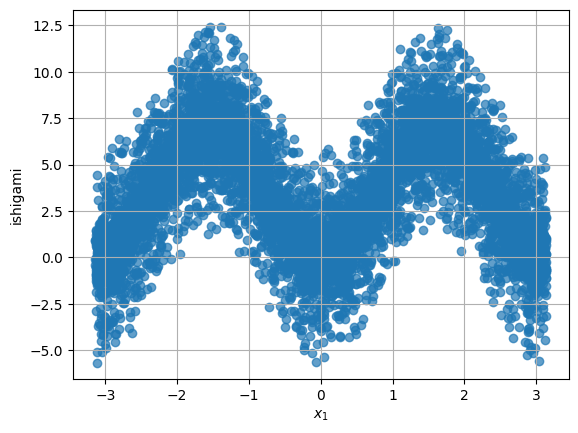

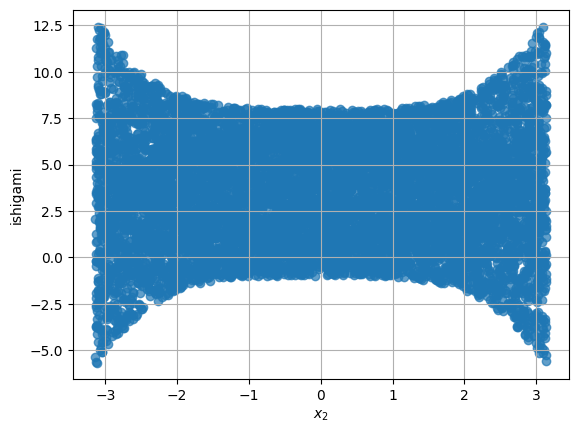

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 
plt.hist(a['G_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('G_0')
plt.show()

plt.hist(a['X_0'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_0')
plt.show()

plt.hist(a['X_1'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_1')
plt.show()


plt.hist(a['X_2'], bins=100, color='blue', edgecolor='black', density=True)
plt.xlabel('X_2')
plt.show()

plt.scatter(a['X_0'], a['G_0'], alpha=0.7)
plt.xlabel('$x_0$')
plt.ylabel('ishigami')
plt.grid(True)
plt.show()

plt.scatter(a['X_1'], a['G_0'], alpha=0.7)
plt.xlabel('$x_1$')
plt.ylabel('ishigami')
plt.grid(True)
plt.show()

plt.scatter(a['X_2'], a['G_0'], alpha=0.7)
plt.xlabel('$x_2$')
plt.ylabel('ishigami')
plt.grid(True) 
plt.show()
